In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
hourly_data = pd.read_csv("data\hour.csv")
daily_data = pd.read_csv("data\day.csv")

In [3]:
hourly_data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values: {hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values: 0


In [5]:
hourly_data.describe().T
# T for better preview

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Preprocessing

In [6]:
preprocessed_data = hourly_data.copy()

In [7]:
seasons_mapping = {1:"Winter", 2:"Spring", \
                   3:"Summer", 4:"Fall"}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [8]:
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [9]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday']\
                               .apply(lambda x: weekday_mapping[x])

In [10]:
weather_mapping = {1:"Clear" , 2:"Cloudy", \
                   3:"Light_rain_snow", 4:"Heavy_rain_snow"}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1


In [12]:
##Sample data
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=21)

,season,yr,weekday,weathersit,hum,windspeed
258,Winter,2011,Wednesday,Clear,86.0,11.0014
256,Winter,2011,Wednesday,Cloudy,86.0,7.0015
9314,Winter,2012,Sunday,Clear,33.0,15.0013
14836,Summer,2012,Saturday,Clear,43.0,27.9993
16816,Fall,2012,Saturday,Cloudy,87.0,7.0015
444,Winter,2011,Thursday,Cloudy,45.0,7.0015
16330,Fall,2012,Sunday,Cloudy,81.0,12.9980
5164,Summer,2011,Monday,Clear,89.0,0.0000
15187,Fall,2012,Sunday,Clear,59.0,0.0000
11331,Spring,2012,Sunday,Light_rain_snow,82.0,16.9979


In [13]:
# verify if the cnt = casual + registered
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),'Sum of casual and registered rides not equal to total number of rides'

In [14]:
# verify if the cnt = casual + registered
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),'Sum of casual and registered rides not equal to total number of rides'

In [15]:

assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

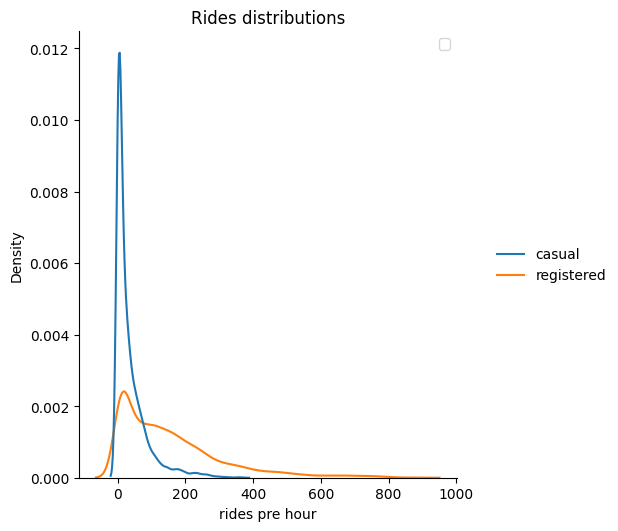

In [16]:
sns.displot( data= [preprocessed_data.casual , preprocessed_data.registered] , kind="kde")
plt.legend()
plt.xlabel("rides pre hour")
plt.title("Rides distributions")
plt.show

 Registered users preform more rides

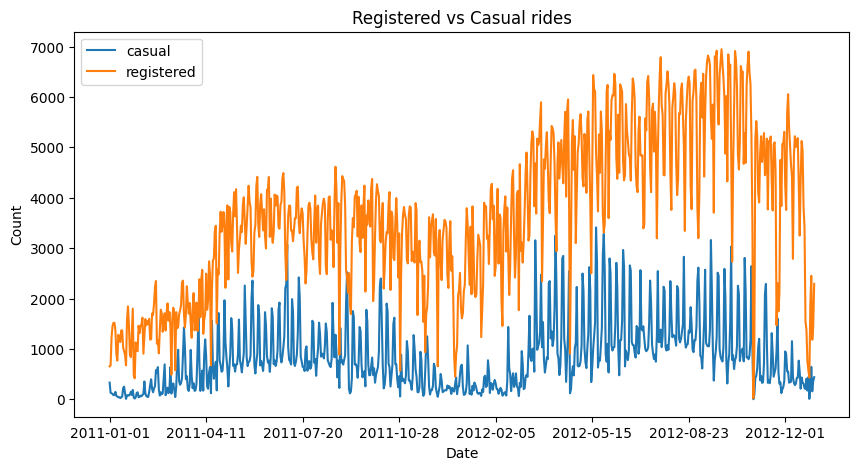

In [31]:
# group by date, plot daily 
preprocessed_data.groupby('dteday')[['casual', 'registered']].sum().plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Registered vs Casual rides')
plt.legend()
plt.show()

In [35]:
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

,registered,casual
dteday,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82


In [36]:
# define window for computing the rolling mean and standard deviation

window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

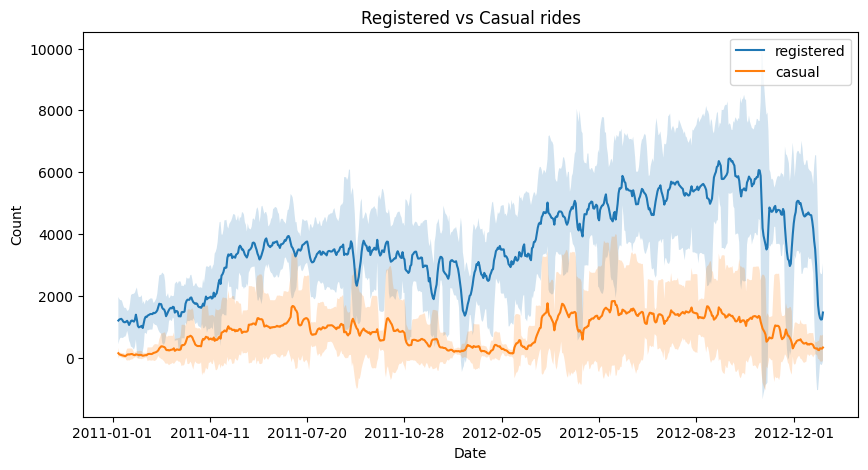

In [58]:
# plot smoother data using the rolling mean and std
ax = rolling_means.plot(figsize=(10,5))
ax.fill_between(rolling_means.index, \
                rolling_means['registered'] + 2*rolling_deviations['registered'], \
                rolling_means['registered'] - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, \
                rolling_means['casual'] + 2*rolling_deviations['casual'], \
                rolling_means['casual'] - 2*rolling_deviations['casual'], \
                alpha = 0.2)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Registered vs Casual rides')
plt.legend()
plt.show()

### Exploring the patterns of the certain hours of the day

In [71]:
plot_data = preprocessed_data[['hr','weekday','registered', 'casual']]

In [72]:
plot_data = plot_data.melt(id_vars=['hr','weekday'], value_vars=['registered','casual'], var_name='type', value_name='count')

In [79]:
plot_data.head()

,hr,weekday,type,count
0,0,Saturday,registered,13
1,1,Saturday,registered,32
2,2,Saturday,registered,27
3,3,Saturday,registered,10
4,4,Saturday,registered,1


c:\Users\Xavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


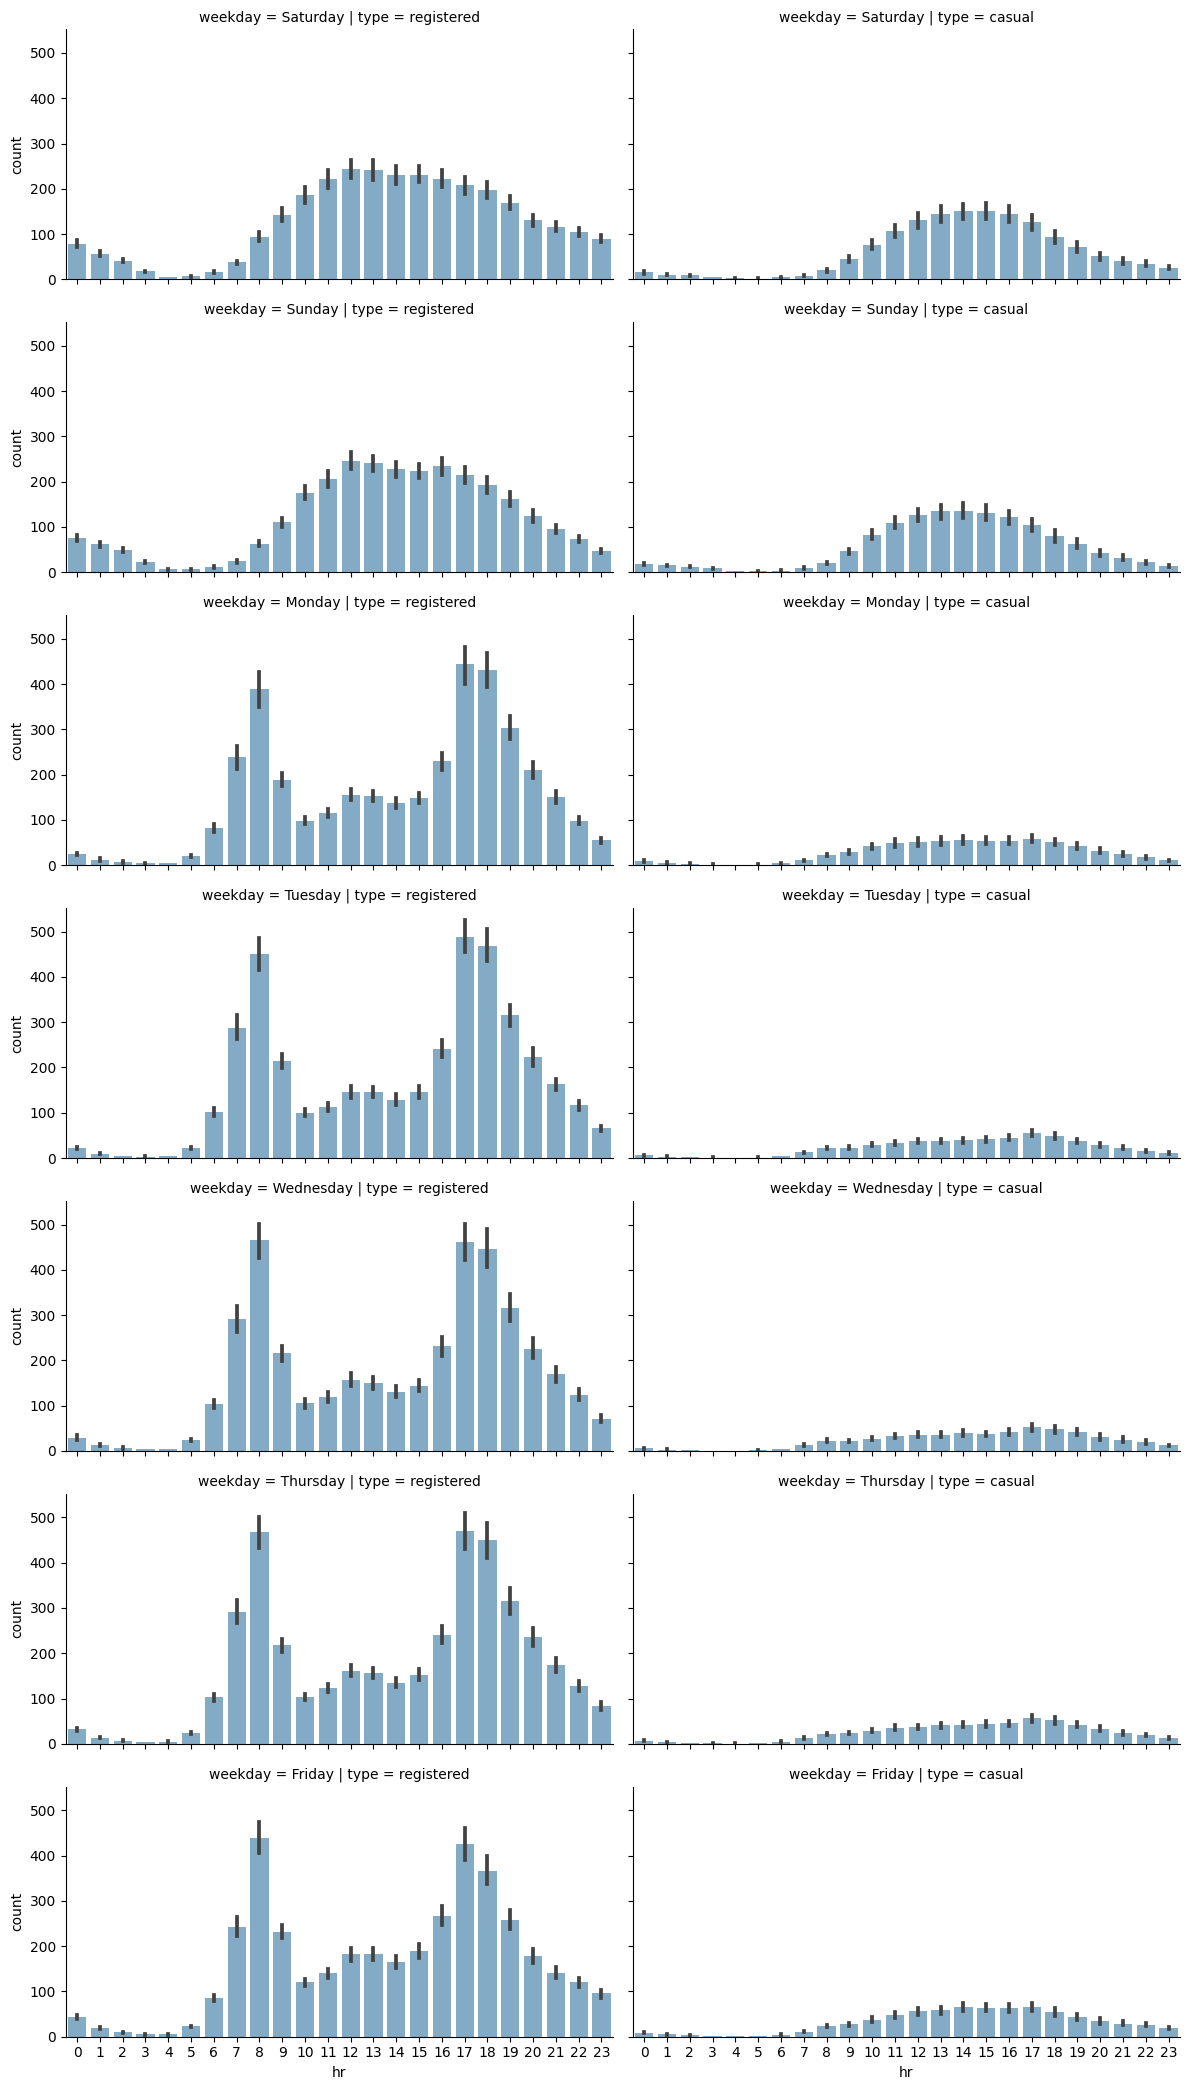

In [83]:
# Facegrid for plotting multiple plots
grid = sns.FacetGrid(plot_data, row='weekday', col='type', aspect=2)
grid.map(sns.barplot, 'hr', 'count', alpha=0.6)
plt.show()

# Distribution of rides on a daily and hourly basis

## Analyzing seasonal impact on rides

In [97]:
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

In [98]:
plot_data = plot_data.melt(id_vars=['hr', 'season'], value_vars=['registered', 'casual'], var_name='type', value_name='count')
plot_data.head()

,hr,season,type,count
0,0,Winter,registered,13
1,1,Winter,registered,32
2,2,Winter,registered,27
3,3,Winter,registered,10
4,4,Winter,registered,1


c:\Users\Xavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


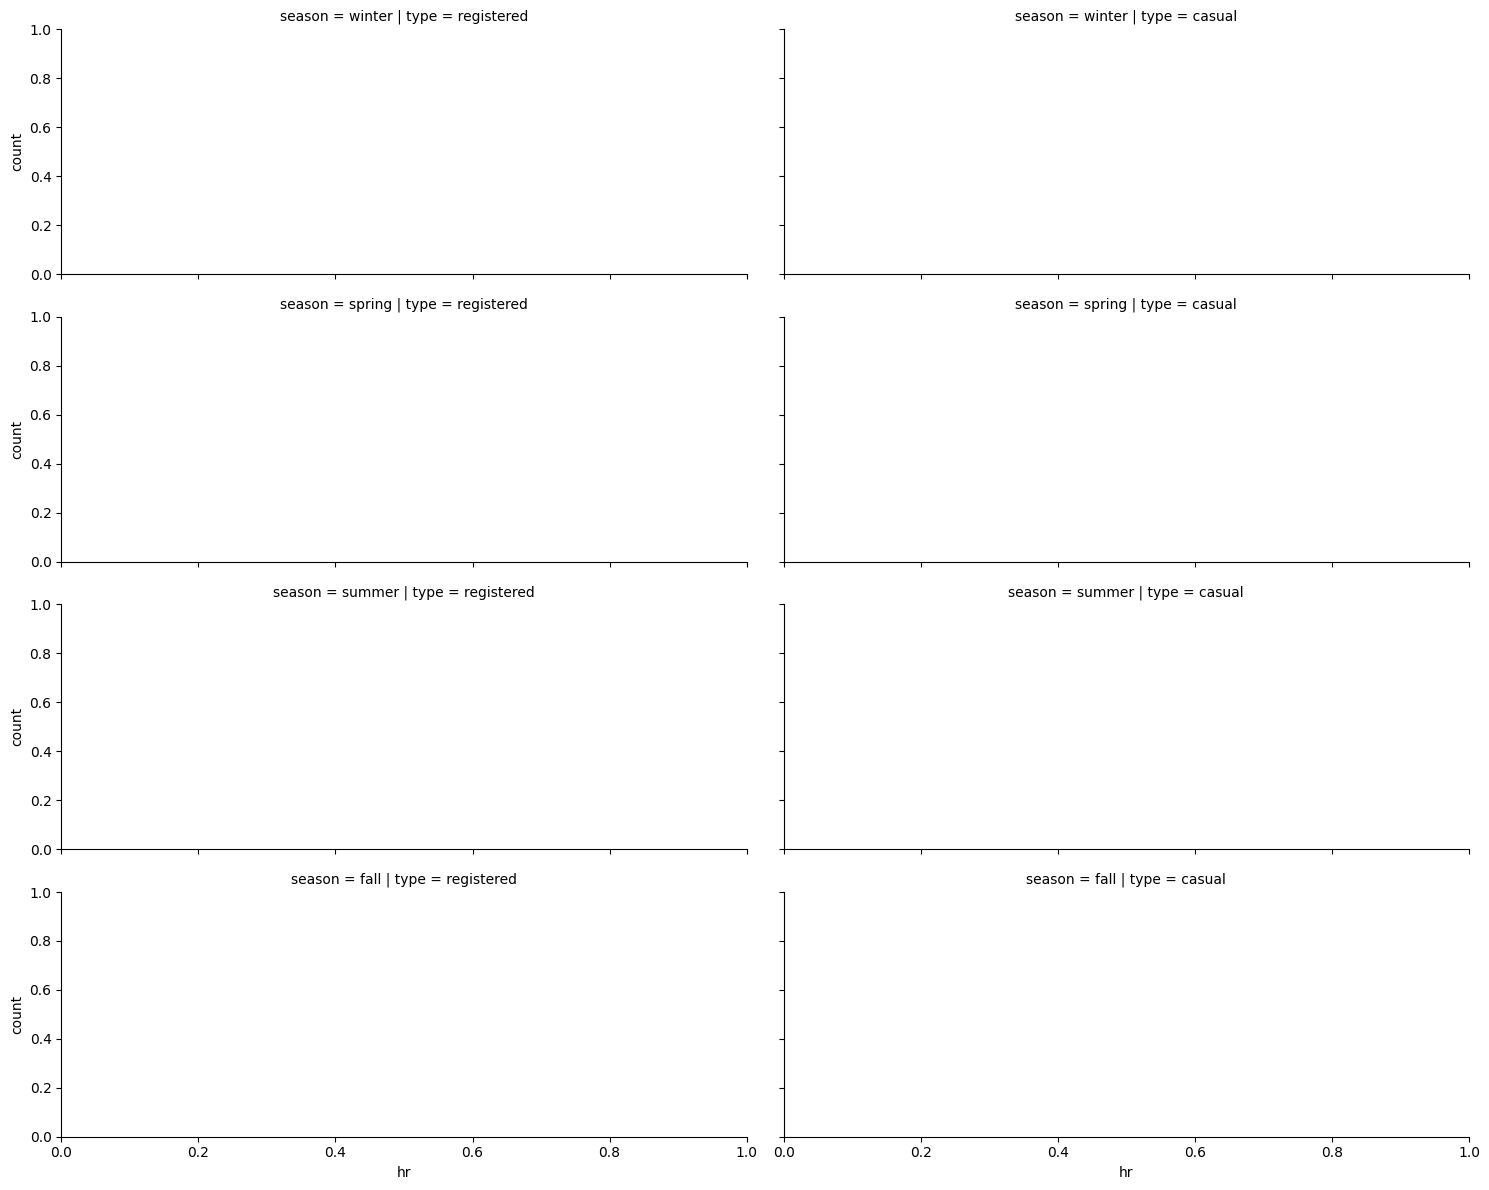

In [99]:
grid = sns.FacetGrid(plot_data, row='season',col='type', aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.6)